# Machine Learning - Linear Regression


## 1. Linear Regression with One Variable

Implement a linear regression model with **one variable** to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### Plotting the Data

In [2]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food-truck-dataset/LinearRegressionMulti.txt
/kaggle/input/food-truck-dataset/LinearRegression1var.txt


In [3]:
df = pd.read_csv(r'/kaggle/input/food-truck-dataset/LinearRegression1var.txt', sep=',', header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#Update Column Names
df.columns = ['population', 'profit']
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.



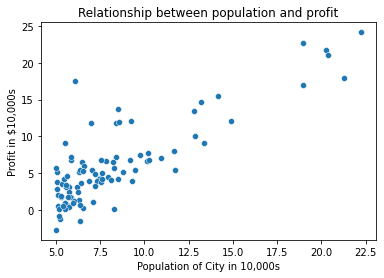

In [5]:
viz = sns.scatterplot(x='population', y='profit', data=df)
viz.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Relationship between population and profit');

>
>The plot shows a positive linear correlation with a few outliers. As Population increases, so does profit. 

#### Gradient Descent?

In **linear regression**, the hypothesis is a statement about the relationship between the dependent variable (y) and the independent variables (x). The most common form of the **hypothesis for linear regression is**:

$h_\theta (x) = \theta^Tx = \theta_0 + \theta_1x_1 $




What is the objective of linear regression?  
>
>To minimize the cost function (Root Mean Square Error RMSE): 

In machine learning, the **cost function** is a measure of how well a model is able to **predict the target variable based on the features**. The cost function is used to optimize the model's parameters, such as the coefficients in a linear regression model or the weights in a neural network.

The **root mean square error (RMSE)** is a common choice for the cost function in regression problems. In this case, the cost function is defined as the RMSE between the predicted values and the actual values:

$$ J(\theta) = {\frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^i) ) - y^i)^2}$$


The cost function is used in conjunction with an optimization algorithm, such as **gradient descent**, to find the values of the model parameters that minimize the cost function and improve the model's predictions.

**Batch Gradient Descent:**

$$ \theta_j := \theta_j - \alpha{\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^i) - y^i)x_j^i} $$

(simultaneously update $\theta_j$ for all ). With each step of gradient descent, your parameters $\theta_j$come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

#### Implement in Python

In [9]:
m = df.shape[0] 
X = np.hstack((np.ones((m,1)), df.population.values.reshape(-1,1)))
y = np.array(df.profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iteration = 1500 
alpha = 0.01 #learning rate

print('m:',m)
print('X:',X.shape)
print('y:',y.shape)
print('theta:',theta.shape)


m: 97
X: (97, 2)
y: (97, 1)
theta: (2, 1)


Now, lets compute the Cost function $J(\theta)$ for one variable

In [23]:
def compute_cost_function(X, y, theta):   
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [26]:
#Plug in variables 
J = compute_cost_function(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [27]:
J = compute_cost_function(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [62]:
J = compute_cost_function(X, y, [[0.1],[1]])
print('With theta = [0.1 ; 1]\nCost computed =', J)
print('Expected cost value (approx) 7.7')

With theta = [0.1 ; 1]
Cost computed = 4.4833877209944
Expected cost value (approx) 7.7


Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

$$ \theta_j := \theta_j - \alpha  \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) := \theta_j - \alpha{\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^i) - y^i)x_j^i} $$

> where $j = 0,1; \alpha$ is the learning rate (steps to update J); 

> $ \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) $ is the derivative (*Calculus flashbacks*)

In [58]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_function(X, y, theta)

    return theta, J_history

In [60]:
theta, _ = gradient_descent(X, y, theta, alpha, iteration)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664


In [64]:
#Plug expected theta values into Cost function:
J = compute_cost_function(X, y, [[-3.6303],[1.1664]])
print('With theta = [-3.6303 ; 1.1664]\nCost computed =', J)
print('Expected cost value (approx) 4.5')

With theta = [-3.6303 ; 1.1664]
Cost computed = 4.4833877209944
Expected cost value (approx) 4.5


#### Plot found values into Linear Regression function 

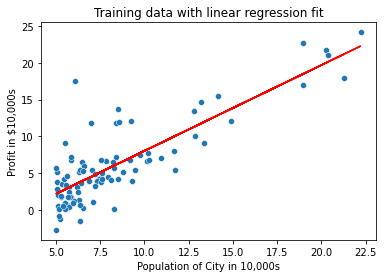

In [65]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

Recall:
$$ h_\theta (x) = \theta^Tx = \theta_0 + \theta_1x_1 $$

In [68]:
y_pred = np.array([1, 5]).dot(theta)
f'For population = 50,000, we predict a profit of {y_pred[0]*10000}'

'For population = 50,000, we predict a profit of 22015.2031227355'

In [71]:
y_pred = np.array([1, 9]).dot(theta)
f'For population = 90,000, we predict a profit of {y_pred[0]*10000}'

'For population = 90,000, we predict a profit of 68669.69713615876'

#### Now, lets visualize $J(\theta)$

Recall: The cost function $J(\theta)$ is bowl-shaped and has a global mininum. This minimum is the optimal point for  $\theta_0$ and $\theta_1$ , and each step of gradient descent moves closer to this point regardless of where you start. This is the magic behind convex functions, you will arrive to the optimal point eventually. 

In [72]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [73]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [74]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

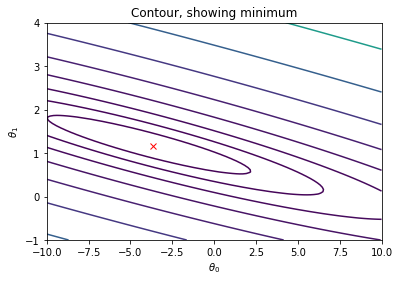

In [75]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

#### Scikit-Learn implementation to compare results

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1), 
            df.profit.values.reshape(-1,1))

LinearRegression()

In [79]:
lin_reg.intercept_, lin_reg.coef_

print('Theta found by gradient descent:\n', theta)
print('\nTheta found using Scikit-learn', lin_reg.intercept_, lin_reg.coef_)

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]

Theta found using Scikit-learn [-3.89578088] [[1.19303364]]


## 2. Linear Regression with Multiple Variables

Implement a linear regression model with **multiple variables** to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing price

In [84]:
df2 = pd.read_csv(r'/kaggle/input/food-truck-dataset/LinearRegressionMulti.txt', sep=',', header=None)
df2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [87]:
#Update Column names and transpose 
df2.columns = ['house_size', 'bedrooms', 'house_price']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> it seems house_size and bedroom columns differ by 1000x. This can slow down the convergence of $\theta_0$ and $\theta_1$ when we use gradient descent. So what must we do? 

**Feature normalization** is the process of scaling the features of a dataset so that they have similar ranges and are in the same units. It is important in machine learning and statistical modeling because it can help improve the performance of the model and make it easier to train.

There are several reasons why feature normalization is important:

>**Algorithmic reasons**: Some machine learning algorithms, such as gradient descent, are sensitive to the scale of the features. By normalizing the features, you can improve the convergence rate of the algorithm and reduce the risk of getting stuck in local optima.

>**Statistical reasons**: In many statistical models, the scale of the features can affect the estimates of the model parameters. By normalizing the features, you can avoid bias in the estimates and improve the interpretability of the model.

>**Data reasons**: In some cases, the scale of the features can be affected by the units of measurement or other factors that are not directly related to the underlying phenomenon being modeled. By normalizing the features, you can remove these extraneous factors and focus on the relationships between the features and the target variable.

Overall, feature normalization is an important preprocessing step that can improve the performance and interpretability of machine learning models.

We can speed up gradient descent by having each of our input values in roughly the same range, ideally $-1 \leq x_i \leq 1$  or  $-0.5 \leq x_i \leq 0.5$.

Mean Normalization: 
$x_i := (\frac{x_i - \mu_i}{s_i}) $ where $\mu_i$ is the average of all the values for features $(i)$ and $s_i$ is the standard deviation (max - min values)

In [88]:
#Normalization function in python
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [89]:
#Apply normalization to house_size and bedrooms
X_norm, mu, sigma = feature_normalize(df2[['house_size', 'bedrooms']])

In [90]:
#Visualize
df2['house_size_normalized'] = X_norm[:,0]
df2['bedrooms_normalized'] = X_norm[:,1]
df2[['house_size_normalized', 'bedrooms_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,3.779483e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.746030e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


#### Gradient Descent for Multivariate regression

Cost function can also be written in it vectorized form:
$$ J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta -y)$$

In [91]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [92]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

#### Selecting learning rates:

There are several ways to find the learning rate for a multivariate regression cost function:

**Grid search**: One approach is to use a grid search to test different learning rates and choose the one that produces the best results. To do this, you would define a range of learning rates to test, and then train the model using each learning rate. You can then evaluate the model's performance using a validation set and choose the learning rate that produces the best results.

**Line search**: Another approach is to use a line search algorithm, which adjusts the learning rate based on the gradient of the cost function. Line search algorithms can be more efficient than grid search because they only need to evaluate a small number of learning rates, rather than testing every possible learning rate.

**Adaptive learning rate methods**: There are also several adaptive learning rate methods that can automatically adjust the learning rate based on the gradient of the cost function. Some examples include Adagrad, RMSprop, and Adam. These methods are generally easier to use than grid search or line search, but they may not always produce the best results.

Ultimately, the best learning rate will depend on the specific characteristics of your data and the model you are using. It may be necessary to try out different learning rates and see which one works best for your particular problem.

In [96]:
m = df2.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df2.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

print(m)
print(X.shape)
print(y.shape)
print(theta.shape)

47
(47, 3)
(47, 1)
(3, 1)


In [113]:
#Test with a few alpha values 
alpha = [0.3, 0.2, 0.1, 0.03, 0.02, 0.01]
colors = ['b','r','m','g','c','p']
num_iters = 50

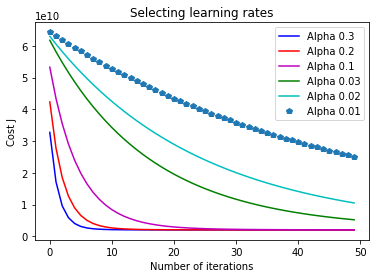

In [114]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [115]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]


**Estimate the price of a 1650 sq-ft, 3 bedrooms house**

In [119]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 1650 square feet and 3 bedrooms: ${y_pred[0]}'

'Price of a house with 1650 square feet and 3 bedrooms: $293081.63514221634'

**Estimate the price of 750 sq-ft, 1 bedrooms house**

In [120]:
sqft = (750 - mu[0])/sigma[0]
bedrooms = (1 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 750 square feet and 1 bedrooms: ${y_pred[0]}'

'Price of a house with 750 square feet and 1 bedrooms: $185266.89268288703'

#### Scikit-Learn implementation to compare results

In [121]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)

LinearRegression()

In [122]:
print('Theta found by gradient descent:\n', theta)
print('\nTheta found using Scikit-learn', lin_reg.intercept_, lin_reg.coef_)

Theta found by gradient descent:
 [[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]

Theta found using Scikit-learn [340412.65957447] [[110631.05027885  -6649.47427082]]


## Conclusion

**Linear regression** is a machine learning technique that is used to model the relationship between a dependent variable and one or more independent variables. It is a simple and widely used method for predicting a quantitative response. Here are some examples of **applications** of linear regression using machine learning:

> **Sales forecasting**: Linear regression can be used to predict future sales based on factors such as marketing expenses, product features, and economic indicators.

>**Credit risk assessment**: Linear regression can be used to predict the likelihood of a borrower defaulting on a loan based on factors such as credit score, income, and debt-to-income ratio.

>**Demand forecasting**: Linear regression can be used to predict the demand for a product or service based on factors such as price, marketing efforts, and seasonality.

>**Salary prediction**: Linear regression can be used to predict an individual's salary based on factors such as education, experience, and job title.

>**Stock price prediction**: Linear regression can be used to predict the future price of a stock based on factors such as earnings, dividends, and market conditions.

These are just a few examples of the many applications of linear regression using machine learning. Linear regression is a simple yet powerful tool for **predicting quantitative outcomes**, and it is widely used in a variety of industries and fields.